<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html

def selection_sort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionOfMax=0 
        for location in range(1,fillslot+1):
            if alist[location]>alist[positionOfMax]:
                positionOfMax = location

        alist[fillslot], alist[positionOfMax] = alist[positionOfMax], alist[fillslot]

In [3]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        
        currentvalue = alist[index]
        position = index

        while position > 0 and alist[position-1] > currentvalue:
            alist[position]=alist[position-1]
            position = position-1

        alist[position]=currentvalue

In [4]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort
# and https://www.geeksforgeeks.org/merge-sort/

def merge_sort(alist):
    # Base case - if list is 1 or less, it is sorted by default
    if len(alist) > 1:

        # Get midpoint of the list with integer division
        midpoint = len(alist) // 2
    
        # Splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # Recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus be sorted.

        # Code below merges the smaller sorted lists into larger sorted lists
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        """Compare left and right lists, merging smaller sorted lists to become larger sorted lists, 
           eventually placing the sorted elements back into alist"""
        while l < len(left_list) and r < len(right_list):
            if left_list[l] <= right_list[r]: # keeps algorithm stable, maintaining order of alist 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            a += 1

        # Some lists will not have a left/right counterpart and so will be dealt with below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1
        # The original list has now been sorted

In [5]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheQuickSort.html?highlight=quicksort

def quick_sort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


In [6]:
# https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def counting_sort(alist, max_val=100):
    m = max_val + 1
    count = [0] * m                
    
    for a in alist:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            alist[i] = a
            i += 1
    return alist

In [7]:
# Create an array of size n consisting of random integers between the values 0-99  
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
def benchmarking(sorting_func):
    
    # List to contain the running times for each algorithm
    sort_times = []

    # Time test for each sorting algorithm
    for n in n_size:
        start_time = time.time()
        sorting_func(random_array(n))
        end_time = time.time()
        time_elapsed = round((end_time - start_time), 3)
        sort_times.append(time_elapsed)
    
    return sort_times

In [10]:
def average_time(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    
    arr_times = np.array(times)
    
    average = np.mean(arr_times, axis=0)
    
    return average

In [11]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)
    
print(all_averages)

[array([1.60000e-03, 7.90000e-03, 3.12000e-02, 7.05000e-02, 1.19400e-01,
       1.99300e-01, 8.00300e-01, 1.76810e+00, 3.21620e+00, 5.00040e+00,
       7.26330e+00, 9.81330e+00, 1.29836e+01]), array([1.5000e-03, 5.5000e-03, 2.1100e-02, 5.1900e-02, 9.6200e-02,
       1.2740e-01, 4.7950e-01, 1.1389e+00, 2.1509e+00, 3.2458e+00,
       4.7653e+00, 6.4411e+00, 8.1612e+00]), array([0.001 , 0.0024, 0.0061, 0.0099, 0.0121, 0.0148, 0.0311, 0.0507,
       0.0736, 0.1005, 0.1122, 0.1359, 0.1534]), array([0.0004, 0.0022, 0.0041, 0.0061, 0.0095, 0.0127, 0.0267, 0.0431,
       0.0639, 0.0829, 0.1117, 0.1373, 0.1861]), array([0.0003, 0.0011, 0.0016, 0.0025, 0.0032, 0.0042, 0.0087, 0.0138,
       0.0183, 0.0203, 0.024 , 0.0276, 0.0311])]


In [12]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

In [13]:
df.round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Insertion Sort,0.002,0.008,0.031,0.070,0.119,0.199,0.800,1.768,3.216,5.000,7.263,9.813,12.984
Selection Sort,0.002,0.006,0.021,0.052,0.096,0.127,0.480,1.139,2.151,3.246,4.765,6.441,8.161
Merge Sort,0.001,0.002,0.006,0.010,0.012,0.015,0.031,0.051,0.074,0.100,0.112,0.136,0.153
Quick Sort,0.000,0.002,0.004,0.006,0.010,0.013,0.027,0.043,0.064,0.083,0.112,0.137,0.186
Counting Sort,0.000,0.001,0.002,0.002,0.003,0.004,0.009,0.014,0.018,0.020,0.024,0.028,0.031


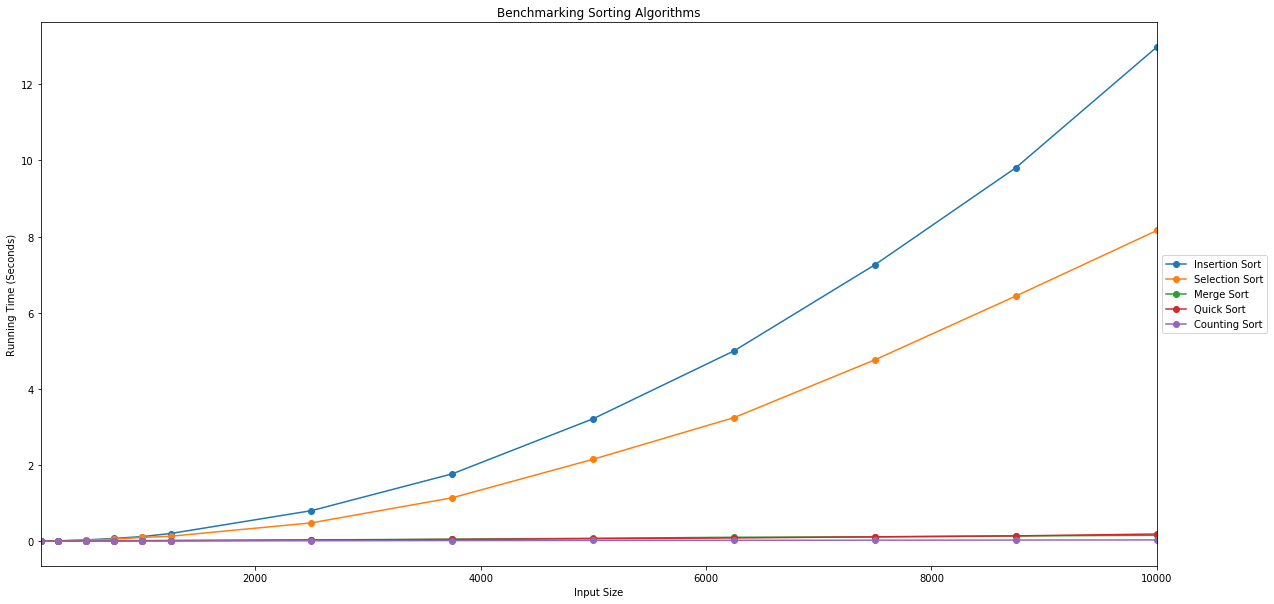

In [14]:
# https://stackoverflow.com/a/31734795
# https://stackoverflow.com/a/43610256
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

The results for Merge, Quick and Counting sorts above are very close to one another along the entire length of the plot above, making it difficult to discern any differences between them. To get a clearer picture, the plot below shows only the results of these algorithm implementations. 

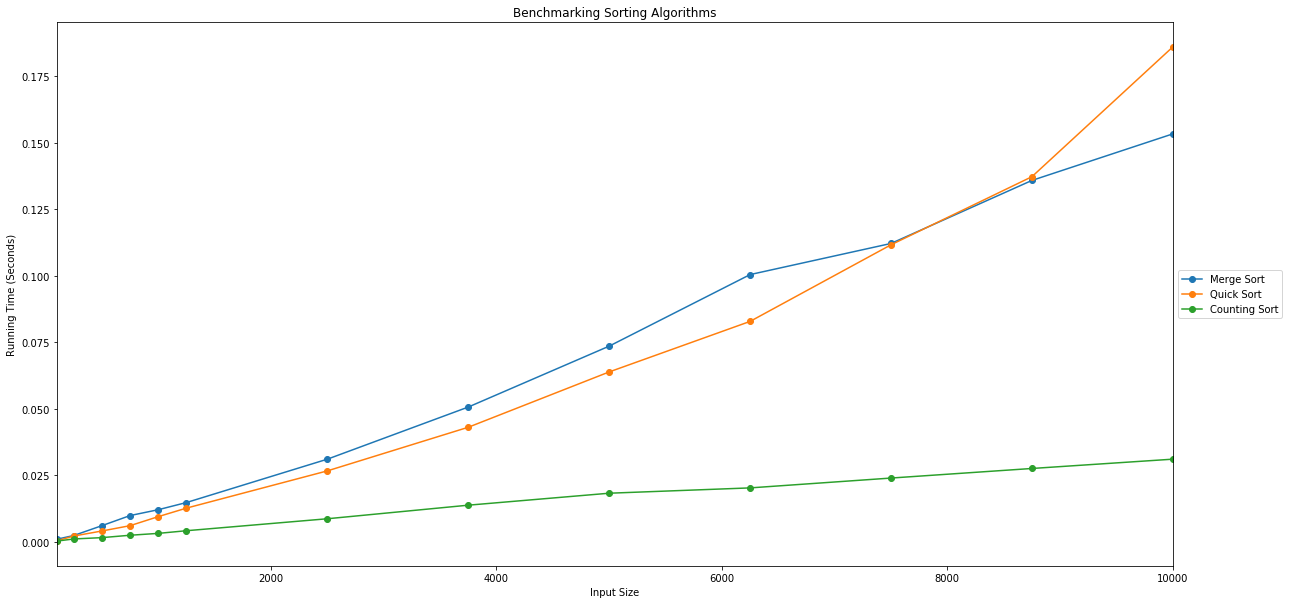

In [15]:
plot = df.iloc[2:5].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

Similarly, it might be interesting to get a closer look at the differences between the algorithms for input values of 1000 and lower. 

In [16]:
n_size = [100, 250, 500, 750, 1000]

In [17]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)
    
print(all_averages)

[array([0.0015, 0.0086, 0.0335, 0.0801, 0.1398]), array([0.0008, 0.0053, 0.0192, 0.0418, 0.0753]), array([0.0013, 0.0025, 0.006 , 0.0105, 0.0141]), array([0.001 , 0.0025, 0.0053, 0.0082, 0.0133]), array([0.0007, 0.0011, 0.0024, 0.0036, 0.0051])]


In [18]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

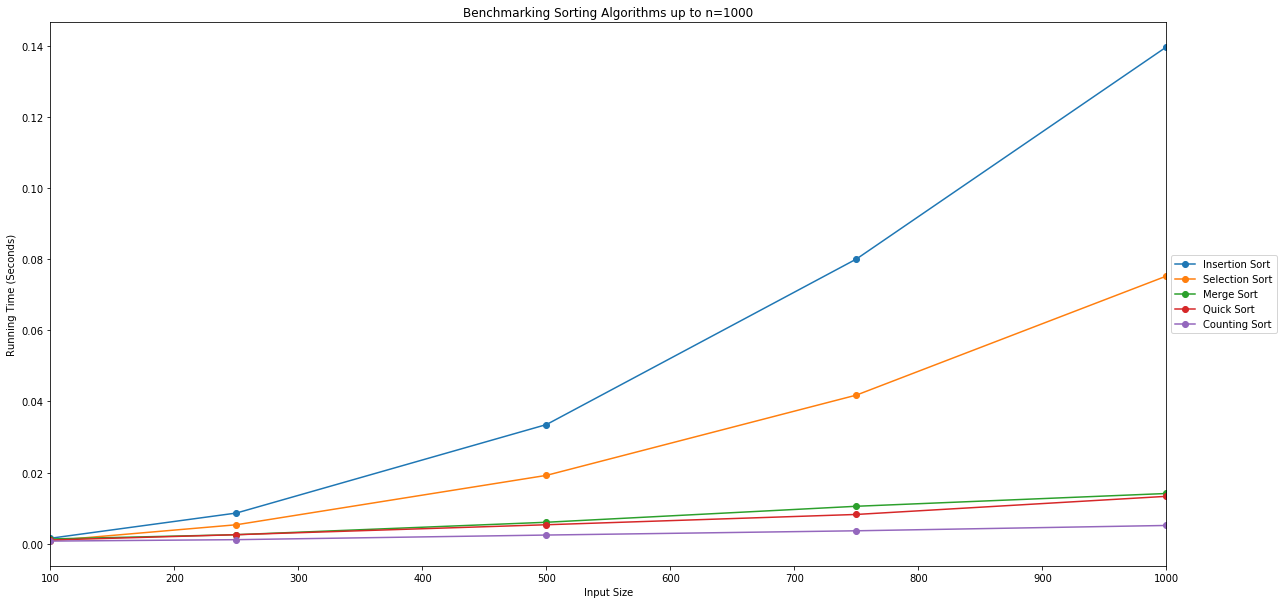

In [19]:
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms up to n=1000", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()